# TME3: introduction à Numpy

> Consignes: le fichier TME3_Sujet.ipynb est à déposer sur le site Moodle de l'UE https://moodle-sciences.upmc.fr/moodle-2019/course/view.php?id=4248. Si vous êtes en binôme, renommez-le en TME3_nom1_nom2.ipynb.

## Exercice 1: 
Implémenter les exemples vu en TD. Imprimer les tableaux résultats pour vérification. 

In [1]:
from PIL import Image
import numpy as np

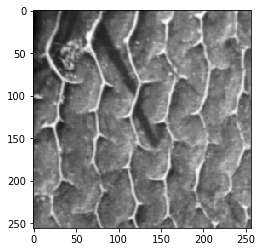

## Exercice 2: Numpy et les images

### 2.1 Normalisation
Normaliser l'image `img/seiche.png`. Indication: utiliser les méthodes `min()` et `max()` de la classe `ndarray`. Afficher l'image PIL `seiche.png` puis le tableau numpy normalisé. Ps: si l'image numpy apparait colorée, utiliser la fonction gray() qui fixe la palette de couleurs d'`imshow()` en niveaux de gris.

min max original 27 172
min max normalisé 0 255


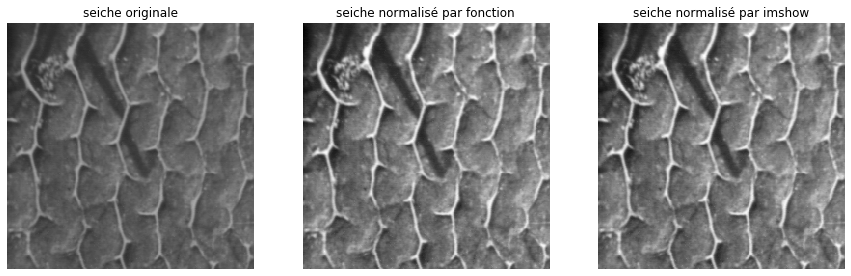

In [59]:
from PIL import Image
from pylab import *
plt.rcParams['figure.figsize']=[15,7]

seiche = Image.open("img/seiche.png")
seiche_array = np.array(seiche,dtype='int32')
kmini = np.min(seiche_array)
kmaxi = np.max(seiche_array)

norme_array=(seiche_array-kmini)*(255)/(kmaxi-kmini)
#norme_array=around(norme_array)
norme_array=norme_array.astype('int32')

print("min max original",kmini,kmaxi)
print("min max normalisé",np.min(norme_array),np.max(norme_array))

subplot(131)
title("seiche originale")
axis('off')
imshow(seiche_array, cmap = 'gray',vmin=0,vmax=255)
subplot(132)
title("seiche normalisé par fonction")
axis('off')
imshow(normaliser, cmap = 'gray')
subplot(133)
title("seiche normalisé par imshow")
axis('off')
imshow(seiche_array, cmap = 'gray')
show()

### 2.2 Visualisation PIL et Numpy
Lire l'image `img/CT-scan.png` (une coupe d'une acquisition d'un scanner X d'un corps humain) avec PIL et sa classe `Image`. Imprimer les extremas de l'image et l'image PIL. Transformer-là en tableau Numpy. A nouveau afficher ce tableau sous forme d'image. Que constatez-vous ?

(0, 2244)


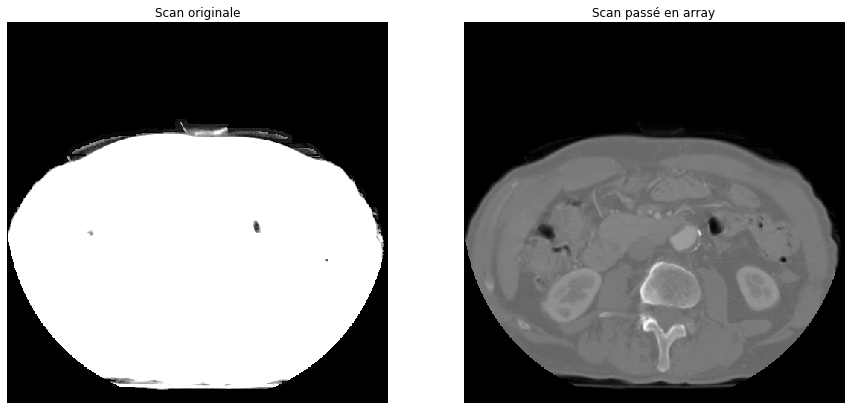

In [73]:
ct_scan = Image.open("img/CT-scan.png")
print(ct_scan.getextrema())

subplot(121)
title("Scan originale")
axis('off')
imshow(ct_scan)

subplot(122)
title("Scan passé en array")
axis('off')
scan_array = np.array(ct_scan)
imshow(scan_array,cmap="gray")
show()

### 2.3 Seuillage
Prendre le tableau numpy de la question précédente. Appliquer un seuillage haut au seuil 255. 
Remarque: cette opération se fait une instruction Python. Afficher le résultat sous forme d'image et comparer avec l'image PIL affichée à la question précédente. Qu'en déduisez vous du comportement de imshow() sur les images PIL ?

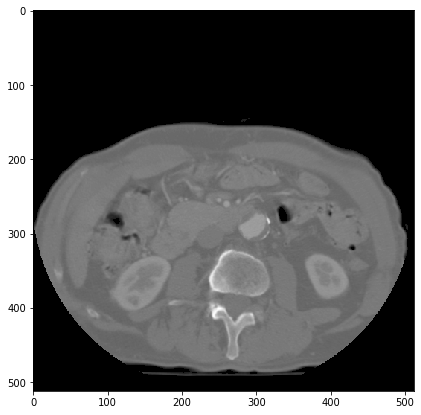

In [94]:
S=255
scan_seuil=scan_array.copy()
scan_seuil[scan_array<S]=0
imshow(scan_seuil, cmap='gray')
show()

### 2.4 Seuillage - suite
Sur la même image, appliquer un seuillage à 1000 et commenter la visualisation de l'image seuillée. Essayer d'autres valeurs de seuils pour différentier certains organes.


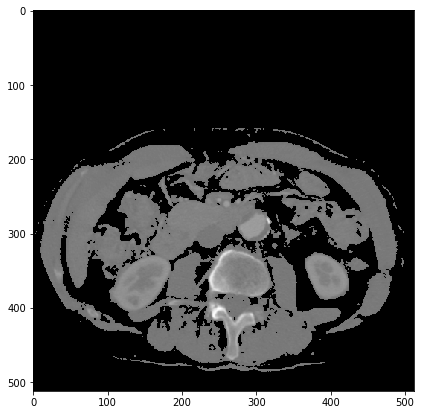

In [95]:
S=1000
scan_seuil_2=scan_array.copy()
scan_seuil_2[scan_array<S]=0
imshow(scan_seuil_2, cmap='gray')
show()

### 2.4 Damier
Comment fabriquer un image qui représente un damier (alternance de 6 cases blanches et 6 cases noires en ligne et en colonne), chaque case étant de taille 20 par 20. On pourra utiliser les fonctions `hstack()`, `vstack()` et `tile()`.

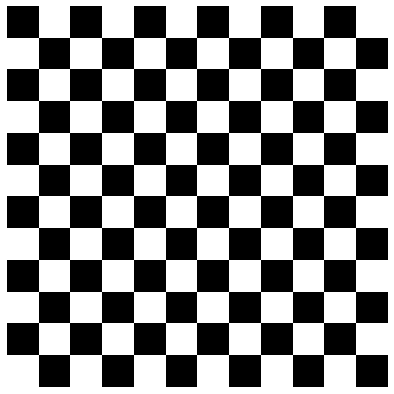

In [109]:
blanc=full((20,20),0)
noir=full((20,20),255)

H1=hstack((blanc,noir))
H2=hstack((noir,blanc))

V=vstack((H1,H2))

Damier=tile(V,(6,6))

axis('off')
imshow(Damier,cmap='gray')
show()

## Exercice 3: Manipulation et parcours de tableaux
### 3.1 Permutation de colonnes
Écrire un code Python qui créé un tableau `A` initialisé à des valeurs quelconque, ou bien une image lue sur le disque, construit un tableau `B` de même taille qui contient en première colonne la dernière colonne de `A`, et pour ses colonnes restantes, les premières colonnes de `A`. 


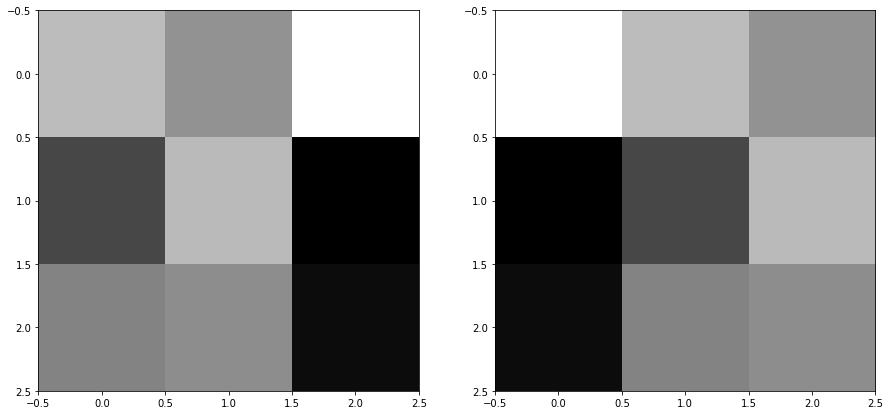

In [127]:
n=3
A=np.random.randint(0,255,n*n).reshape((n,n))

subplot(121)
imshow(A,cmap='gray')

B=array(A)
#B[:,0]=A[:,-1]
for i in range(A.shape[1]):
    B[:,i]=A[:,-1+i]


subplot(122)
imshow(B,cmap='gray')

show()

### 3.2 Duplication de lignes et colonnes
Écrire un code Python qui prend le même tableau `A`, créé un tableau `A2` ayant 2 lignes et deux colonnes de plus que `A` et telque :
 - `A2` privé de ses premières et dernières lignes et colonnes doit valoir `A`. 
 - Les bords de `A2` doivent correspondre aux bords de `A`. Les valeurs aux coins de A2 ne devraient pas vous poser de problème !


### 3.3 Temps de calcul
Reprendre l'exercice 2 du TME2 en utilisant Numpy: calculer les extremas d'un tableau numpy (de grande taille, par exemple l'image `../TME2/img/genies-math.jpg` convertie en niveaux de gris), en parcourant par indice les valeurs du tableau. Puis utiliser les méthodes `min()` et `max()`. Chronométrer les temps grâce aux fonctions `tic()` et `tac()`. Discuter ces temps.

In [2]:
from time import process_time
mytime = 0
def tic():
    global mytime
    mytime = process_time()
def tac():
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

###
